# Import Statements

In [55]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import math 
import random

# Helper Functions

## Input Colors
* 6 colors: Red, Green, Blue, Yellow, Pink, Teal
* 24 total shades --> 4 shades per color!
* Matplotlib only recognizes RGB colors in form: (r,g,b) where r,g,b in range 0-1

In [56]:
def input_vectors():

    rgb_scale = []
    
    # Red
    rgb_scale.append((255,0,0))
    rgb_scale.append((250,93,93))
    rgb_scale.append((238,42,42))
    rgb_scale.append((193,6,6))

    # Green
    rgb_scale.append((0,255,0))
    rgb_scale.append((16,209,16))
    rgb_scale.append((30,144,30))
    rgb_scale.append((123,243,123))

    # Blue
    rgb_scale.append((0,0,255))
    rgb_scale.append((88,88,255))
    rgb_scale.append((29,29,193))
    rgb_scale.append((13,13,171))

    # Yellow
    rgb_scale.append((255,255,0))
    rgb_scale.append((242,242,58))
    rgb_scale.append((236,236,34))
    rgb_scale.append((249,249,108))

    # Pink
    rgb_scale.append((255,0,255))
    rgb_scale.append((210,18,210))
    rgb_scale.append((238,137,238))
    rgb_scale.append((152,34,152))

    # Teal
    rgb_scale.append((0,255,255))
    rgb_scale.append((0,128,128))
    rgb_scale.append((115,240,240))
    rgb_scale.append((81,206,206))

    converted_scale = np.asarray(rgb_scale)/255
    np.random.shuffle(converted_scale)
    
    

    return converted_scale



In [57]:
def initialize_weights():
    W = np.random.rand(100,100,3)
    return W

In [58]:
def winning_neuron(input_vector, weights):     
    sub = input_vector - weights
    square = np.power(sub,2)
    performance_matrix = np.sum(square, axis = 2)
    winner = np.unravel_index(performance_matrix.argmin(), performance_matrix.shape)
    
    return winner

In [59]:
def distance_matrix(winner):
    arr = np.zeros([100,100])
    result = np.where(arr == 0)
    result = np.asarray(result)
    first = result[0]
    second = result[1]
    combined = np.vstack((first, second)).T
    combined = combined.reshape(100,100,2)
    
    distance_matrix = combined - winner
    
    distance_matrix = np.sqrt(np.sum((np.power(distance_matrix,2)),axis=2))

    return distance_matrix

In [60]:
def learning_rate(current_epoch,total_epoch):
    alpha_zero = 0.8
    learning_rate = alpha_zero * math.exp(-1 * current_epoch/total_epoch)

    return learning_rate

In [61]:
def neighborhood(sigma_nought,current_epoch,total_epochs, distance_matrix):

    sigma = sigma_nought * math.exp(-1 * current_epoch/total_epochs)
    neighborhood = np.exp(-1 * np.power(distance_matrix,2)/ math.pow(2*sigma,2))

    return neighborhood

In [62]:
def update_weights(weights,input,current_epoch,total_epoch,neighborhood):
    neighborhood = neighborhood.reshape(100,100,1)
    alpha = learning_rate(current_epoch, total_epoch)
    difference = input - weights

    updated_weights = weights + alpha*neighborhood*difference

    return updated_weights

# Question 4 Code
1. Initialize all weights to small random values, set a value for neighborhood, N, and learning rate, alpha
2. Choose an input from the input set (ie. 1/24 colors with its 3 RGB features) and input 
3.  Select winning unit c (ie. index of best matching output unit) such that performance index I is minimized
4. Update weights according to global network updating phase from iteration k to k+1
5. Continue until # of iterations reached --> learning rate and neighborhood size should decrease over time


# Main Function

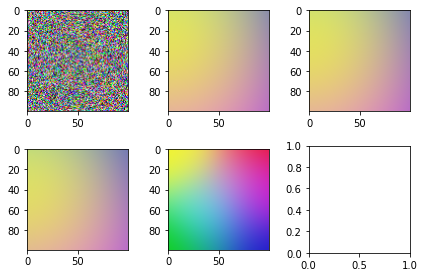

In [63]:
def main(sigma_nought):
    weights = initialize_weights()
    input_color = input_vectors()
    total_epochs = 1000

    plot_weights = []
    plot_weights.append(weights)
    for epoch in range(total_epochs):
        for i in range(len(input_color)):
            crown = winning_neuron(input_color[i], weights)
            d_ij = distance_matrix(crown)
            h_ij = neighborhood(sigma_nought, epoch, total_epochs, d_ij)
            weights = update_weights(weights,input_color[i],epoch,total_epochs,h_ij)
            
        if epoch == 19 or epoch == 39 or epoch == 99 or epoch == 999:
            plot_weights.append(weights)

    
    figure, axes = plt.subplots(nrows=2, ncols=3)
    axes[0,0].imshow(plot_weights[0])
    axes[0,1].imshow(plot_weights[1])
    axes[0,2].imshow(plot_weights[2])
    axes[1,0].imshow(plot_weights[3])
    axes[1,1].imshow(plot_weights[4])

    figure.tight_layout()

# Pass sigma_nought value here 
main(50)
